# Plot Chlorophyll L2
Plot the level-2, chlorophyll concentration downloaded from [OceanColor](oceancolor.gsfc.nasa.gov/).

In [1]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from importlib import reload
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
coast = cfeature.GSHHSFeature(scale="f")
plt.style.use("./filament.mplstyle")

In [2]:
logger = logging.getLogger("filamentPlotChloro")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 1

In [3]:
figdir = "../figures/SST/BloomJune2024/"
datadir = "/home/ctroupin/data/SST/BloomJune2024/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*OC*.nc")))
logger.info(f"Found {len(datafilelist)} files")

INFO:filamentPlotChloro:Found 7 files


In [4]:
coordinates = (-20, -10, 25., 32)
mediumdomain = (-19., -6., 25., 35.)
smalldomain = (-15., -9., 27., 33.)
tinydomain = (-12., -9., 29.5, 32.)
canarydomain = (-19., -13., 26., 30.)
northadriatic = (11.794320605825732, 15.716089778648666, 43.74787953486202, 45.93382503086502)
capeblanc = (-24., -14., 17., 27.)
elhierro = (-19, -16, 27., 29)
coordinates = canarydomain

myproj = ccrs.Mercator(0.5 * (coordinates[0] + coordinates[1]),
                       min_latitude=coordinates[2],
                       max_latitude=coordinates[3])

In [5]:
datadir2 = "/home/ctroupin/data/Adriatic/toplot/"
datafilelistcmems = sorted(glob.glob(os.path.join(datadir2, "*CMEMS_HROC_L3-tur-*.nc")))
len(datafilelistcmems)

31

In [5]:
for datafile in datafilelist:
    
    chloro = filament.Chloro()
    chloro.read_from_copernicus(datafile, bbox=coordinates)
    chloro.fname = datafile
    figname = chloro.get_figname()
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, projection=myproj)
    plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=20)
    ax.set_extent(coordinates)
    pcm = ax.imshow(chloro.field, extent=coordinates, cmap=plt.cm.RdYlBu_r,
                    vmin=0, vmax=10., alpha=1, transform=ccrs.PlateCarree())

    cb = plt.colorbar(pcm, extend="max")
    ax.add_feature(coast, linewidth=.2, color=".75")
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.5, color='.25', linestyle='--', zorder=2)
    gl.top_labels = False
    gl.right_labels = False

    plt.savefig(os.path.join(figdir, figname))
    plt.close()

KeyError: 'lon'

## Loop on files

In [7]:
for datafile in datafilelist:
    
    chloro = filament.Chloro()
    chloro.read_from_oceancolorL2(datafile)
    chloro.fname = datafile
    title = chloro.get_title(datafile)
    figname = chloro.get_figname()
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, projection=myproj)
    ax.set_title(title, fontsize=20)
    ax.set_extent(coordinates)
    pcm = ax.pcolormesh(chloro.lon, chloro.lat, chloro.field, cmap=plt.cm.RdYlBu_r,
                    vmin=0, vmax=0.75, alpha=1, transform=ccrs.PlateCarree())

    cb = plt.colorbar(pcm, extend="max")
    ax.add_feature(coast, linewidth=.2, color=".75")
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.5, color='.25', linestyle='--', zorder=2)
    gl.top_labels = False
    gl.right_labels = False

    plt.savefig(os.path.join(figdir, figname))
    #plt.show()
    plt.close()

## SST at the same date

In [7]:
figdir = "../figures/SST/"
sstfile = "/data/SST/CapeGhir/V2017247140000.L2_SNPP_SST.nc"
sst = filament.SST()
sst.read_from_oceancolorL2(sstfile)
sst.apply_qc()

figname = sst.get_figname()

/home/ctroupin/Software/PythonEnvs/Filament3.8/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


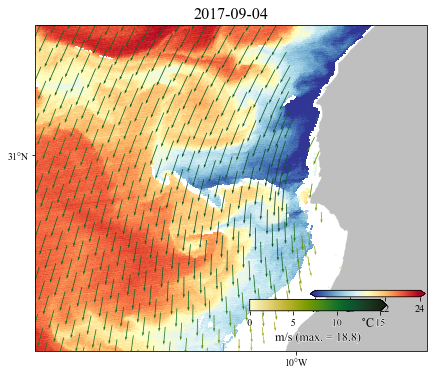

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)
plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

sst.add_to_plot(fig, ax, domain=tinydomain, cmap=plt.cm.RdYlBu_r,
                clim=[18., 24.], vis=False,
                cbarloc=[0.65, 0.25, 0.2, 0.015],
                alpha=1)

wind.add_to_plot(fig, ax, domain=tinydomain, cmap=cmocean.cm.speed,
                 clim=[0., 15.], vis=False,
                 quivscale=200, quivwidth=0.002
                )

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, tinydomain, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))
#plt.savefig(os.path.join(figdir, figname))
plt.show()
plt.close()

## Wind from ASCAT

In [10]:
windfile = "/data/Wind/ASCAT/GranCanaria/ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.l2.nc.gz"

In [11]:
wind = filament.Wind()
wind.read_from_quikscat(windfile)
wind.compute_speed()

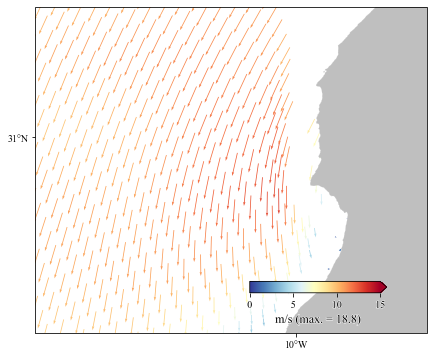

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)

#plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

wind.add_to_plot(fig, ax, domain=tinydomain, cmap=plt.cm.RdYlBu_r,
                 clim=[0., 15.], vis=False,
                 quivscale=200, quivwidth=0.002
                )

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, tinydomain, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))

#plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight",
#           facecolor="w", transparent=False)
plt.show()
plt.close()

### CCPM product

In [31]:
windfile = "/data/Wind/CCMP/CCMP_RT_Wind_Analysis_20170904_V02.1_L3.0_RSS.nc"
windfigdir = "../figures/wind/"

In [32]:
wind = filament.Wind()
wind.read_from_ccmp(windfile)
wind.u = wind.u[0,:,:]
wind.v = wind.v[0,:,:]
wind.compute_speed()

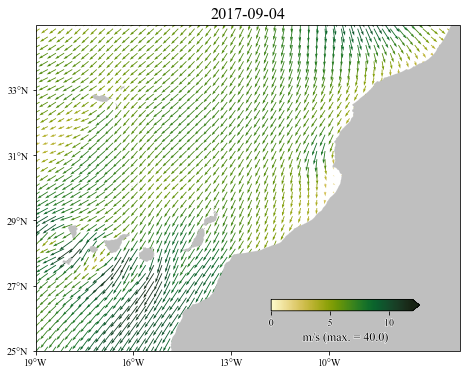

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection=myproj)

plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

wind.add_to_plot(fig, ax, domain=coordinates, cmap=cmocean.cm.speed,
                 clim=[0., 12.], vis=False,
                 quivscale=250, quivwidth=0.002,
                )

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, coordinates, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))

#plt.savefig(os.path.join(windfigdir, "wind_CCPM_20170904"), dpi=300, bbox_inches="tight",
#           facecolor="w", transparent=False)
plt.show()
plt.close()

## Wind and SST

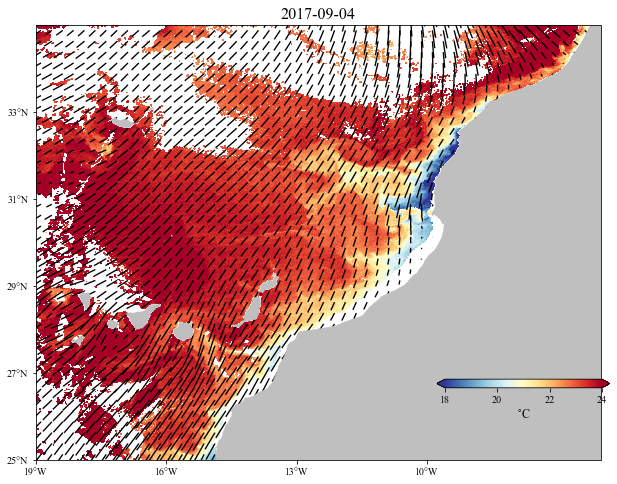

In [29]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=myproj)
plt.title(datetime.datetime.strftime(chloro.date, "%Y-%m-%d"), fontsize=16)

sst.add_to_plot(fig, ax, domain=mediumdomain, cmap=plt.cm.RdYlBu_r,
                clim=[18., 24.], vis=False,
                cbarloc=[0.65, 0.25, 0.2, 0.015],
                alpha=1)

ax.quiver(wind.lon, wind.lat, wind.u, wind.v, color="k", 
          scale=200, headwidth=0.01)

ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, mediumdomain, np.arange(-19., -7., 3.), 
                      np.arange(25., 35., 2.))
#plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight",
#           facecolor="w", transparent=False)
plt.show()
plt.close()